<a href="https://colab.research.google.com/github/plaban1981/Mitra_AI/blob/main/itanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

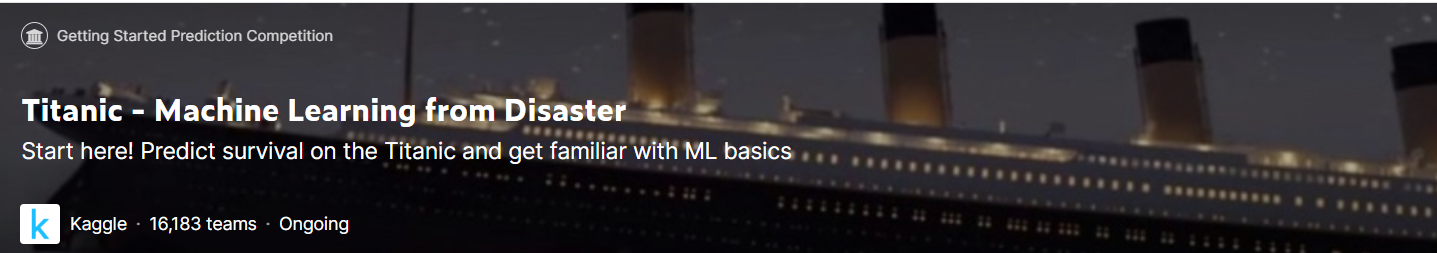

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"plabannayak","key":"e07977afd437047e0247b86b331025b8"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets list

ref                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
alphiree/cardiovascular-diseases-risk-prediction-dataset       Cardiovascular Diseases Risk Prediction Dataset    5MB  2023-07-03 12:12:19           4333        178  1.0              
nelgiriyewithana/countries-of-the-world-2023                   Global Country Information Dataset 2023           23KB  2023-07-08 20:37:33           3170        118  1.0              
arnavsmayan/netflix-userbase-dataset                           Netflix Userbase Dataset                          25KB  2023-07-04 07:38:41           4337         88  1.0              
iamsouravbanerjee/data-science-salaries-2023                   Latest Data Scien

In [5]:
! kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 69.5MB/s]


In [6]:
!unzip /content/titanic.zip -d data

Archive:  /content/titanic.zip
  inflating: data/gender_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/data/gender_submission.csv
/content/data/train.csv
/content/data/test.csv


In [8]:
train_data = pd.read_csv("/content/data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test_data = pd.read_csv("/content/data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Check for Null Values

In [14]:
train_data.isnull().sum()[train_data.isnull().sum() > 0] /train_data.shape[0] * 100.0

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [15]:
test_data.isnull().sum()[test_data.isnull().sum() > 0] /test_data.shape[0] * 100.0

Age      20.574163
Fare      0.239234
Cabin    78.229665
dtype: float64

In [16]:
cols_to_consider = ['Survived','Pclass','Sex','SibSp','Parch','Fare','Embarked']

In [17]:
train_data = train_data[cols_to_consider]
train_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [18]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 4.5 MB/s eta 0:00:00


In [19]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [20]:
train_data.fillna(-999,inplace=True)
test_data.fillna(-999,inplace=True)

In [21]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [22]:
x = train_data.drop('Survived',axis=1)
y = train_data.Survived

In [23]:
x.dtypes

Pclass        int64
Sex          object
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [24]:
cate_features_index = np.where(x.dtypes != float)[0]
cate_features_index

array([0, 1, 2, 3, 5])

In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.15,random_state=1234)

## Model Building

In [53]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42,num_boost_round=1000)

In [54]:
#now just to make the model to fit the data
model.fit(xtrain,ytrain,cat_features=cate_features_index,eval_set=(xtest,ytest))

Learning rate set to 0.029583
0:	learn: 0.8018494	test: 0.8059701	best: 0.8059701 (0)	total: 3.02ms	remaining: 3.02s
1:	learn: 0.8044914	test: 0.8059701	best: 0.8059701 (0)	total: 5.97ms	remaining: 2.98s
2:	learn: 0.8071334	test: 0.8059701	best: 0.8059701 (0)	total: 7.63ms	remaining: 2.54s
3:	learn: 0.8058124	test: 0.8059701	best: 0.8059701 (0)	total: 9.47ms	remaining: 2.36s
4:	learn: 0.8044914	test: 0.8059701	best: 0.8059701 (0)	total: 11.8ms	remaining: 2.34s
5:	learn: 0.8031704	test: 0.8059701	best: 0.8059701 (0)	total: 14.5ms	remaining: 2.4s
6:	learn: 0.8058124	test: 0.8059701	best: 0.8059701 (0)	total: 17.3ms	remaining: 2.45s
7:	learn: 0.8044914	test: 0.8059701	best: 0.8059701 (0)	total: 19.7ms	remaining: 2.44s
8:	learn: 0.8044914	test: 0.8059701	best: 0.8059701 (0)	total: 21.6ms	remaining: 2.38s
9:	learn: 0.8071334	test: 0.8059701	best: 0.8059701 (0)	total: 24.2ms	remaining: 2.4s
10:	learn: 0.8058124	test: 0.8134328	best: 0.8134328 (10)	total: 26.1ms	remaining: 2.35s
11:	learn: 0.

## Cross Validation

In [55]:
model.get_params()

{'random_seed': 42,
 'use_best_model': True,
 'eval_metric': 'Accuracy',
 'num_boost_round': 1000}

In [34]:
import catboost
help(catboost.cv)

Help on function cv in module catboost.core:

cv(pool=None, params=None, dtrain=None, iterations=None, num_boost_round=None, fold_count=None, nfold=None, inverted=False, partition_random_seed=0, seed=None, shuffle=True, logging_level=None, stratified=None, as_pandas=True, metric_period=None, verbose=None, verbose_eval=None, plot=False, plot_file=None, early_stopping_rounds=None, save_snapshot=None, snapshot_file=None, snapshot_interval=None, metric_update_interval=0.5, folds=None, type='Classical', return_models=False, log_cout=<ipykernel.iostream.OutStream object at 0x7e70e10236d0>, log_cerr=<ipykernel.iostream.OutStream object at 0x7e70e1023700>)
    Cross-validate the CatBoost model.
    
    Parameters
    ----------
    pool : catboost.Pool
        Data to cross-validate on.
    
    params : dict
        Parameters for CatBoost.
        CatBoost has many of parameters, all have default values.
        If  None, all params still defaults.
        If  dict, overriding some (or all)

In [56]:
from catboost import Pool, CatBoostClassifier, cv
cv_data = cv(pool=Pool(x,y,cat_features=cate_features_index),params={'random_seed': 42, 'use_best_model': True, 'eval_metric': 'Accuracy','num_boost_round': 1000,"loss_function": "Logloss"},fold_count=10)

Streaming output truncated to the last 5000 lines.
24:	learn: 0.8167082	test: 0.8089888	best: 0.8651685 (0)	total: 68.5ms	remaining: 2.67s
25:	learn: 0.8117207	test: 0.8089888	best: 0.8651685 (0)	total: 72.9ms	remaining: 2.73s
26:	learn: 0.8117207	test: 0.8089888	best: 0.8651685 (0)	total: 77ms	remaining: 2.77s
27:	learn: 0.8117207	test: 0.8089888	best: 0.8651685 (0)	total: 79ms	remaining: 2.74s
28:	learn: 0.8179551	test: 0.8089888	best: 0.8651685 (0)	total: 80.9ms	remaining: 2.71s
29:	learn: 0.8179551	test: 0.8089888	best: 0.8651685 (0)	total: 83ms	remaining: 2.68s
30:	learn: 0.8179551	test: 0.8089888	best: 0.8651685 (0)	total: 85.7ms	remaining: 2.68s
31:	learn: 0.8179551	test: 0.8089888	best: 0.8651685 (0)	total: 87.4ms	remaining: 2.64s
32:	learn: 0.8179551	test: 0.8089888	best: 0.8651685 (0)	total: 90.3ms	remaining: 2.65s
33:	learn: 0.8167082	test: 0.8089888	best: 0.8651685 (0)	total: 93.2ms	remaining: 2.65s
34:	learn: 0.8179551	test: 0.8089888	best: 0.8651685 (0)	total: 95.9ms	rema

In [43]:
cv_data.keys()

Index(['iterations', 'test-Accuracy-mean', 'test-Accuracy-std',
       'train-Accuracy-mean', 'train-Accuracy-std', 'test-Logloss-mean',
       'test-Logloss-std', 'train-Logloss-mean', 'train-Logloss-std'],
      dtype='object')

In [57]:
print('the best cv accuracy is :{}'.format(np.max(cv_data["test-Accuracy-mean"])))

the best cv accuracy is :0.805850073771422


In [58]:
from sklearn.metrics import accuracy_score
print('the test accuracy is :{:.6f}'.format(accuracy_score(ytest,model.predict(xtest))))

the test accuracy is :0.828358


## Prediction

In [50]:
pred = model.predict(test_data[x.columns])
pred = pred.astype(np.int)
submission = pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':pred})

<ipython-input-50-670427b8908b>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pred = pred.astype(np.int)


In [51]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [52]:
submission.to_csv("Plaban_submission_catboost.csv",index=False)

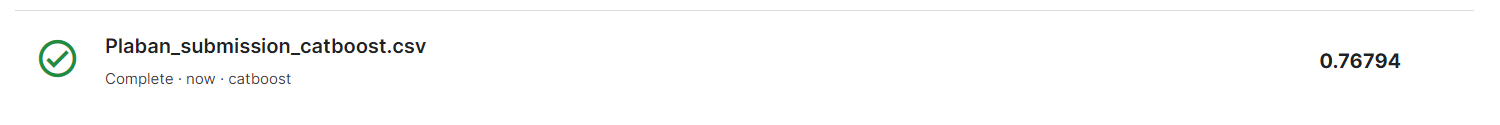

In [60]:
from sklearn.model_selection import StratifiedKFold
iterations = 5
scores = []
scores_val = []
target = y
temp = x
predictions = []
for i in range(iterations):
        print(f'Running {i+1} iteration')

        kfold = StratifiedKFold(n_splits = 5, shuffle=True)

        for train_index,test_index in kfold.split(temp,target):
            xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
            ytrain,ytest = target[train_index],target[test_index]

            model = CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42,num_boost_round=1000)
            model.fit(xtrain,ytrain,cat_features=cate_features_index,eval_set=(xtest,ytest))

            preds = model.predict(xtest)

            print(accuracy_score(ytest, preds))
            scores.append(accuracy_score(ytest, preds))
            #
    #
    #
print('-----------KFOLD--------------')
print(np.mean(scores))

Streaming output truncated to the last 5000 lines.
36:	learn: 0.8160112	test: 0.8044693	best: 0.8044693 (18)	total: 79ms	remaining: 2.05s
37:	learn: 0.8174157	test: 0.8044693	best: 0.8044693 (18)	total: 81.4ms	remaining: 2.06s
38:	learn: 0.8174157	test: 0.7988827	best: 0.8044693 (18)	total: 83.8ms	remaining: 2.06s
39:	learn: 0.8174157	test: 0.7932961	best: 0.8044693 (18)	total: 86.3ms	remaining: 2.07s
40:	learn: 0.8188202	test: 0.7988827	best: 0.8044693 (18)	total: 88.7ms	remaining: 2.08s
41:	learn: 0.8202247	test: 0.7932961	best: 0.8044693 (18)	total: 91.3ms	remaining: 2.08s
42:	learn: 0.8202247	test: 0.7932961	best: 0.8044693 (18)	total: 93.8ms	remaining: 2.09s
43:	learn: 0.8202247	test: 0.7932961	best: 0.8044693 (18)	total: 96.3ms	remaining: 2.09s
44:	learn: 0.8202247	test: 0.7932961	best: 0.8044693 (18)	total: 99ms	remaining: 2.1s
45:	learn: 0.8202247	test: 0.7932961	best: 0.8044693 (18)	total: 102ms	remaining: 2.1s
46:	learn: 0.8202247	test: 0.7932961	best: 0.8044693 (18)	total: 1

In [61]:
from sklearn.metrics import accuracy_score
print('the test accuracy is :{:.6f}'.format(accuracy_score(ytest,model.predict(xtest))))

the test accuracy is :0.837079


In [62]:
pred = model.predict(test_data[x.columns])
pred = pred.astype(np.int)
submission = pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':pred})

<ipython-input-62-670427b8908b>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pred = pred.astype(np.int)


In [63]:
submission.to_csv("Plaban_submission_catboost1.csv",index=False)

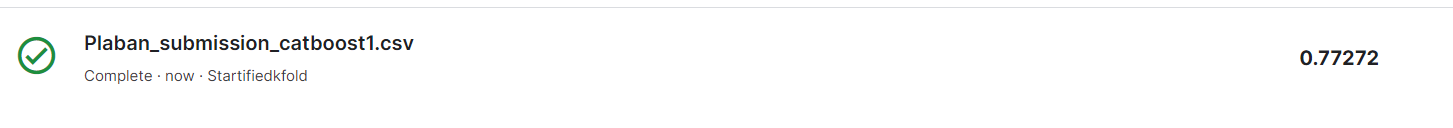